In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt


In [2]:
infile = open('fairness_ready.pkl','rb')
df = pickle.load(infile)
infile.close()

Build subgroups

In [3]:
#Abi eltern
df.AbiEltern = df.AbiEltern.astype('float')
df_abi = df[df.AbiEltern > 0]
df_keinAbi = df[df.AbiEltern ==0]
df_weissnicht = df[df.AbiEltern.isnull()]

print(len(df_abi.UserID_y.unique()))
print(len(df_keinAbi.UserID_y.unique()))
print(len(df_weissnicht.UserID_y.unique()))

1206
464
1079


In [4]:
#Gender
df_boys = df[df.Sex__m == 1]
df_girls = df[df.Sex__w == 1]
print(len(df_boys.UserID_y.unique()))
print(len(df_girls.UserID_y.unique()))

1339
1325


In [5]:
# Migration
df_deutsch = df[df.eigSprache == 1]
df_migration = df[df.eigSprache == 0]

print(len(df_deutsch.UserID_y.unique()))
print(len(df_migration.UserID_y.unique()))

1683
1066


In [6]:
#Bedeuteung Note
# df['BedeutungNoten'] = df['BedeutungNoten'].replace(['1','2'],0)
# df['BedeutungNoten'] = df['BedeutungNoten'].replace(['3','4'],1)
df['BedeutungNoten'] = df['BedeutungNoten'].replace(['1'],0)
df['BedeutungNoten'] = df['BedeutungNoten'].replace(['4'],1)
df_bedeutung0 = df[df.BedeutungNoten == 0]
df_bedeutung1 = df[df.BedeutungNoten ==1]

print(len(df_bedeutung0.UserID_y.unique()))
print(len(df_bedeutung1.UserID_y.unique()))


70
626


In [7]:
# Anzahl Bücher
# df['Buecher'] = df['Buecher'].replace(['10', '50'],0)
# df['Buecher'] = df['Buecher'].replace(['100','200'],1)
df['Buecher'] = df['Buecher'].replace(['10'],0)
df['Buecher'] = df['Buecher'].replace(['200'],1)
df_buch0 = df[df.Buecher == 0.0]
df_buch1 = df[df.Buecher == 1]

print(len(df_buch0.UserID_y.unique()))
print(len(df_buch1.UserID_y.unique()))

149
1092


Build matrices for each subgroup and t

In [8]:
df_name = [df_abi, df_keinAbi, df_boys, df_girls, df_deutsch, df_migration, df_buch0, df_buch1, df_bedeutung0, df_bedeutung1]
matrice = ['matrices_forte_abi', 'matrices_forte_keinAbi','matrices_forte_boys','matrices_forte_girls', 'matrices_forte_deutsch', 'matrices_forte_migration', 'matrices_buecher_0', 'matrices_buecher_1', 'matrices_bedeutung0', 'matrices_bedeutung1']


for (df_name, matrice) in zip(df_name, matrice):
    df_1 = df_name.loc[df_name['OrderNumber'] ==1]
    matrix1_path = matrice + '/matrix1.pkl'
    df_1.to_pickle(matrix1_path)

    n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]

    for x in n:
        df_x = df_name.loc[df_name['OrderNumber'] < (x+1)]
        df_x = df_x.groupby('UebungsID').agg({'ID':'count','Erstloesung': 'sum', 'Schussel': 'sum', 'Erfolg': 'sum', 'Schwierigkeit': 'mean', 'ist_Schulzeit': 'first', 'MehrfachFalsch':'first', 'vorher_abgebrochen':'first', 'y':'first','UserAttribut':'first', 'Fehler':'first', 
    'Klassenstufe':'first', 'Jahredabei':'first', 'AnzahlAufgaben':'first', 'Art__GK':'first', 'Art__GR':'first', 'Art__GZ':'first',
        'Art__K':'first', 'Art__LB':'first', 'HA__HA':'first', 'HA__Self':'first', 'HA__nt':'first', 'HA__vt':'first', 'HA__zt':'first',
        'Sex__m':'first', 'Sex__w':'first', 'Testposition__pruefung':'sum', 'Testposition__training':'sum','Testposition__version':'sum', 'OrderNumber':'max', 'steps':'max'})

        df_x = df_x.loc[df_x['ID'] ==x]     
        path = matrice + '/matrix'+ str(x) +'.pkl'
        df_x.to_pickle(path)


Get count per subgroup and t

In [9]:
group = ['abiEltern', 'abiEltern', 'gender', 'gender', 'erstsprache', 'erstsprache', 'buecher', 'buecher', 'bedeutungNoten', 'bedeutungNoten']
subgroup = ['abi', 'keinAbi', 'boys', 'girls', 'deutsch', 'migration', 'buch0', 'buch1', 'bedeutung0','bedeutung1']
df_name = [df_abi, df_keinAbi, df_boys, df_girls, df_deutsch, df_migration, df_buch0, df_buch1, df_bedeutung0, df_bedeutung1]
sentence_len= pd.DataFrame(columns=['Sentence', 'Count','group','subgroup'])
matrice = ['matrices_forte_abi', 'matrices_forte_keinAbi','matrices_forte_boys','matrices_forte_girls', 'matrices_forte_deutsch', 'matrices_forte_migration', 'matrices_buecher_0', 'matrices_buecher_1', 'matrices_bedeutung0', 'matrices_bedeutung1']

for (df_name, group, subgroup, matrice) in zip(df_name, group, subgroup, matrice):
    n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]

    for x in n:
        path=matrice+'/matrix'+str(x)+'.pkl'
        infile = open(path,'rb')
        get_length = pickle.load(infile)
        l = len(get_length)
        sentence_len = sentence_len.append({'Sentence': x, 'Count':l,'group':group,'subgroup':subgroup}, ignore_index=True)

    sentence_len['Sentence']=sentence_len['Sentence'].astype('int')
    sentence_len['Count']=sentence_len['Count'].astype('int')


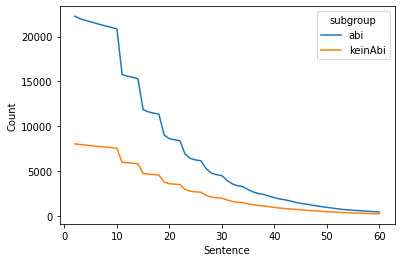

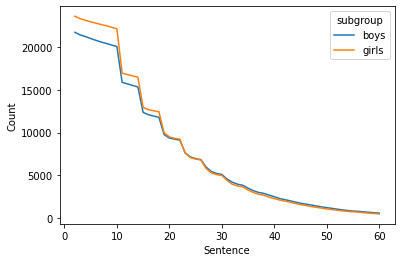

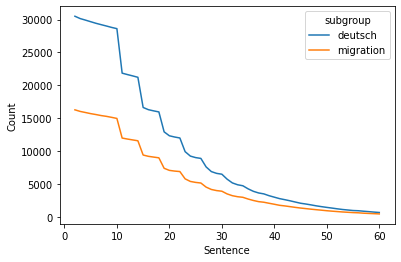

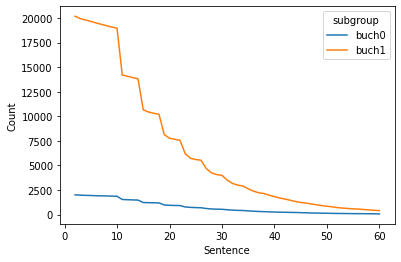

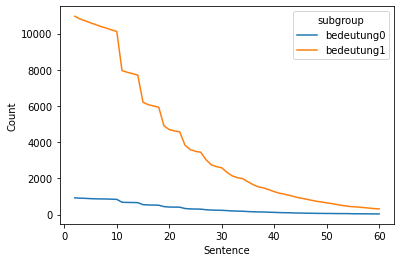

In [10]:
group = ['abiEltern', 'gender', 'erstsprache', 'buecher', 'bedeutungNoten']

for x in group:
    df = sentence_len[sentence_len.group ==x]
    sns.lineplot(data=df, x="Sentence", y="Count", hue='subgroup')
    plt.show()

Count of users per subgroup

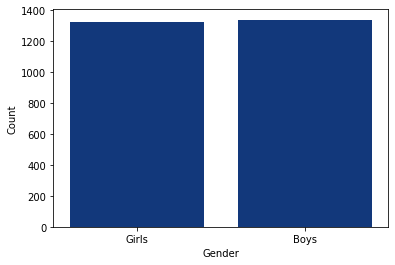

In [3]:
data = {'Count':  [1325, 1339],
        'Gender': ['Girls', 'Boys']
        }

df = pd.DataFrame (data, columns = ['Count','Gender'])

ax = sns.barplot(data=df, y='Count', x='Gender', color='#00338d')

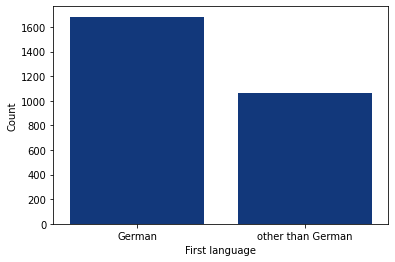

In [5]:
data = {'Count':  [1683, 1066],
        'First language': ['German','other than German']
        }

df = pd.DataFrame (data, columns = ['Count','First language'])

ax = sns.barplot(data=df, y='Count', x='First language', color='#00338d')

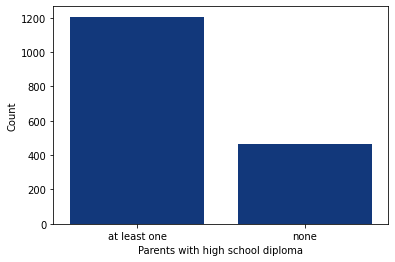

In [7]:
data = {'Count':  [1206,464],
        'Parents with high school diploma': ['at least one','none']
        }

df = pd.DataFrame (data, columns = ['Count','Parents with high school diploma'])

ax = sns.barplot(data=df, y='Count', x='Parents with high school diploma', color='#00338d')

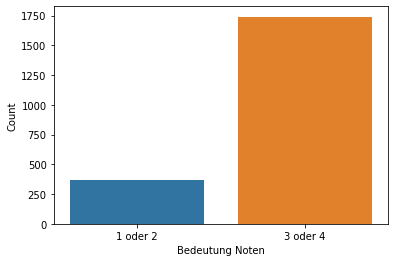

In [15]:
data = {'Count':  [367,1741],
        'Bedeutung Noten': ['1 oder 2','3 oder 4']
        }

df = pd.DataFrame (data, columns = ['Count','Bedeutung Noten'])

ax = sns.barplot(data=df, y='Count', x='Bedeutung Noten')

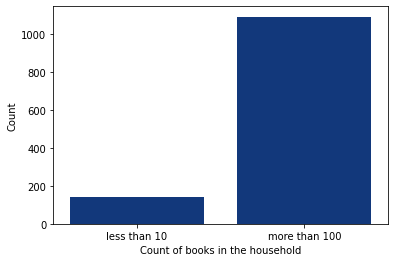

In [2]:
data = {'Count':  [142,1092],
        'Count of books in the household': ['less than 10', 'more than 100']
        }

df = pd.DataFrame (data, columns = ['Count','Count of books in the household'])

ax = sns.barplot(data=df, y='Count', x='Count of books in the household', color='#00338d')